In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Modelos de Séries Temporais

# Modelos ARIMA

Exemplo da AULA - SÉRIES TEMPORAIS - Prof. Dr. Fabiano Guasti Lima <BR>
AULA MINISTRADA EM R E TRADUZIDA PARA PYTHON COMO FORMA DE APRENDIZADO.

Conjunto de observações ordenadas no tempo.

A série deve conter dados identados ao longo do tempo, ou seja, não deve haver furos ao longo do tempo. <br> 
Deve ser preenchidos com técnicas adequadas para cada caso.

## Definindo os Valores de p, d e q

- p: ordem da parte autorregressiva: PACF (função de autocorrelação parcial)
- d: grau de diferenciação: teste de estacionariedade
- q: ordem da média móvel: ACF (função de autocorrelação)

## Escolha dos Modelos

- ***Critério de AIC***: (Menor Melhor) Estima a quantidade relativa de informações perdiadas por determinado modelo.<br> Quanto menos informações um modelo perde, maior a qualidade desse modelo e menor a pontuação AIC.


- ***Critério de BIC***: (Menor Melhor) Critério de Informação Bayesiano


## Passo-a-passo

- 1o: Verificar se a série é estacionária ou não através do teste Dickey-Fuller
- 2o: Entender se existe sazonalidade;
- 3o: Verificar a Autocorrelação e Autocorrelação Parcial;
- 4o: Pode-se aplicar o modelo Auto-Arima;
- 5o: Verificar se os erros possuem distribuição normal e se não são autocorrelacionados;
- 6o: Avaliar se existe heterocedasticidade nos resíduos;

# Base Consumo de Energia Elétrica GWh

Ipeadata para Regiões S, SE, CO, NE e N <br>
Período de jan/1979 a mar/23

In [103]:
consumo_brasil = pd.read_csv(r'bases\consumo_brasil.csv', dtype={'Data': str})
consumo_brasil['Data'] = consumo_brasil['Data'].astype('str')
consumo_brasil.head(40)

Data  Consumo regiao
0   1979.01      228     CO
1   1979.02      231     CO
2   1979.03      228     CO
3   1979.04      243     CO
4   1979.05      241     CO
5   1979.06      242     CO
6   1979.07      250     CO
7   1979.08      247     CO
8   1979.09      254     CO
9   1979.10      268     CO
10  1979.11      263     CO
11  1979.12      277     CO
12  1980.01      271     CO
13  1980.02      267     CO
14  1980.03      268     CO
15  1980.04      285     CO
16  1980.05      264     CO
17  1980.06      290     CO
18  1980.07      279     CO
19  1980.08      286     CO
20  1980.09      307     CO
21  1980.10      294     CO
22  1980.11      306     CO
23  1980.12      296     CO
24  1981.01      301     CO
25  1981.02      302     CO
26  1981.03      300     CO
27  1981.04      310     CO
28  1981.05      309     CO
29  1981.06      306     CO
30  1981.07      299     CO
31  1981.08      304     CO
32  1981.09      322     CO
33  1981.10      316     CO
34  1981.11      313     CO
35  1981.12      310     CO
36  1982.01      325     CO
37  1982.02      309     CO
38  1982.03      319     CO
39  1982.04      336     CO

## Transformando a Base em uma série temporal

In [104]:
from datetime import datetime

consumo_brasil['Data'] = consumo_brasil['Data']\
                            .apply(lambda x: pd.to_datetime(datetime.strptime(x, "%Y.%m").date()))

In [105]:
consumo_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     2645 non-null   datetime64[ns]
 1   Consumo  2645 non-null   int64         
 2   regiao   2645 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 62.1+ KB


In [106]:
#consumo_brasil = consumo_brasil.set_index('Data')

# Gráfico

In [107]:
# Agrupa a base por data e estado
consumo_gb = consumo_brasil.groupby(['Data','regiao'], as_index=False)['Consumo'].mean()

In [108]:
consumo_gb['Data'] = pd.to_datetime(consumo_gb['Data'])

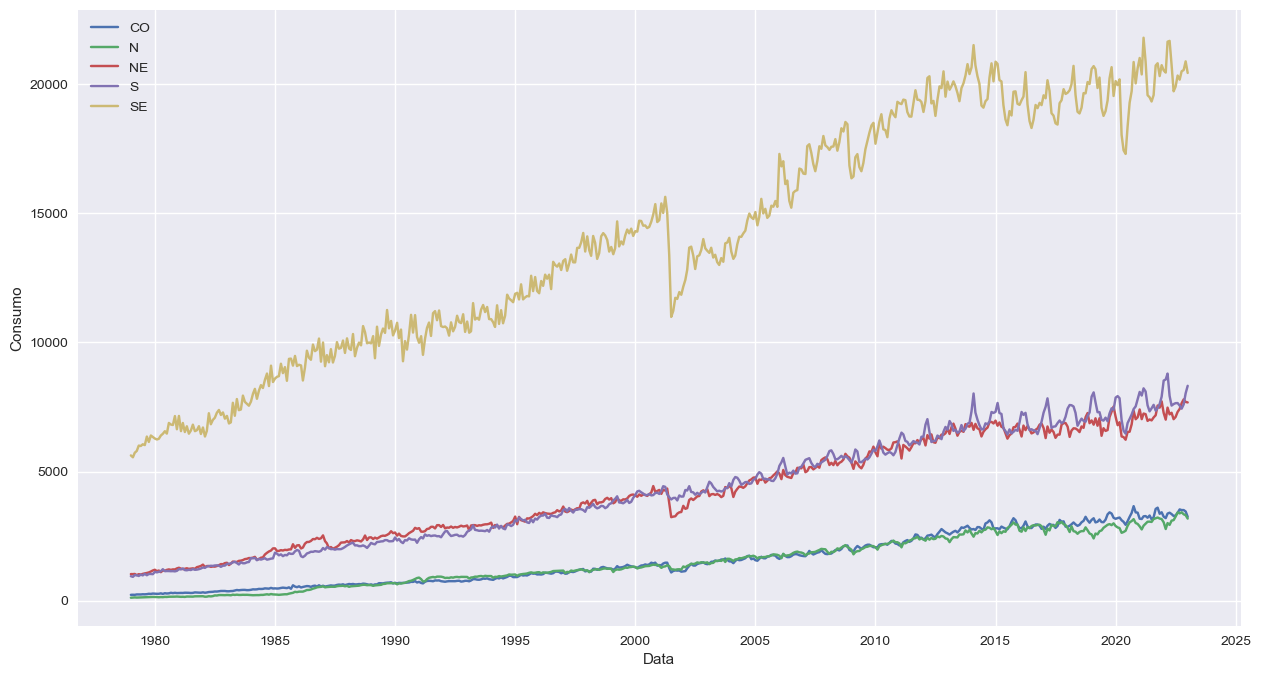

In [109]:
#Plotando o Gráfico
plt.style.use('seaborn')
plt.figure(figsize=(15,8))

sns.lineplot(y='Consumo', x='Data', hue='regiao' ,data=consumo_gb)
plt.xlabel('Data')
plt.ylabel('Consumo')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [110]:
# Inserindo Data como Índice
consumo_gb = consumo_gb.set_index('Data')

In [111]:
consumo_gb

regiao  Consumo
Data                      
1979-01-01     CO    228.0
1979-01-01      N    116.0
1979-01-01     NE   1031.0
1979-01-01      S    949.0
1979-01-01     SE   5623.0
...           ...      ...
2023-01-01     CO   3247.0
2023-01-01      N   3178.0
2023-01-01     NE   7673.0
2023-01-01      S   8316.0
2023-01-01     SE  20423.0

[2645 rows x 2 columns]

# Analisando Região SE

In [126]:
# Selecionando Região SE
consumo_se = consumo_gb[consumo_gb['regiao'] == 'SE']
consumo_se = consumo_se.drop('regiao', axis=1)

In [127]:
# Transformando em uma Série Temporal
data = pd.date_range(start='1979-01-01', end='2023-02-01', freq='M')
valor = np.array(consumo_se.Consumo)

consumo_se = pd.Series(data=valor, index=data)

<AxesSubplot:>

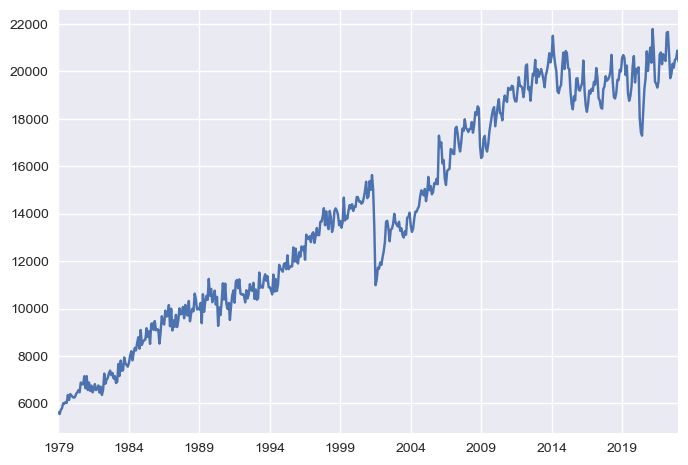

In [128]:
consumo_se.plot()

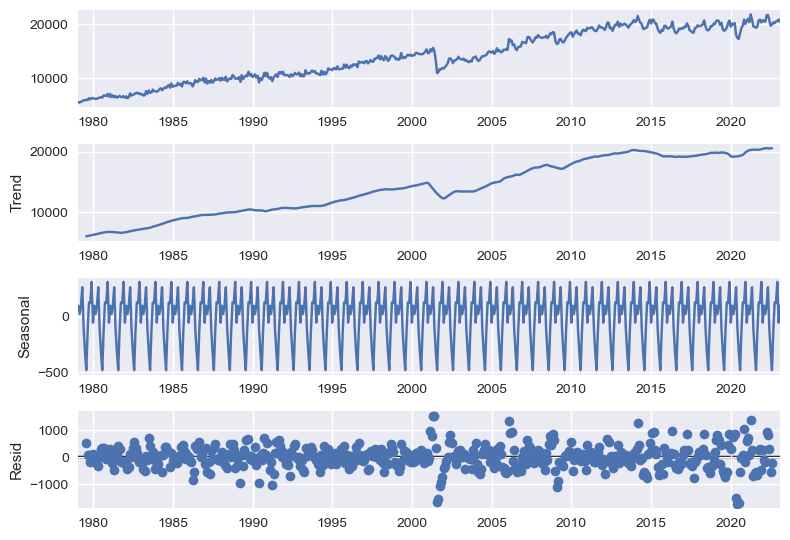

In [236]:
import statsmodels.api as sm

# decomposição da série temporal
decomposicao = sm.tsa.seasonal_decompose(consumo_se, model='add');

# exibindo os resultados
decomposicao.plot();

# Modelo ETS (Error, Trend, Seasonality)

Documentação: https://www.statsmodels.org/dev/generated/statsmodels.tsa.exponential_smoothing.ets.ETSModel.html

Melhor modelo encontrado no R:

- erros = miltiplicativo;
- tendência = aditivo;
- suavização = true;
- sazonalidade = multiplicativo

No python é necessário fazer um looping testando todas as possibilidades e trazer o modelo que apresenta o menor erro

In [204]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

model_ets = ETSModel(consumo_se, 
                     error='mul', 
                     trend='add', 
                     damped_trend=True, 
                     seasonal='mul',
                     freq='M').fit()

In [205]:
pred_ets = model_ets.forecast(steps=12)

In [206]:
# Função calcula Intervalo de Confiânça

def ets_forecast(model, h=8):
    # Simulate predictions.
    n_steps_prediction =h 
    n_repetitions = 1000
    
    yhat = model.forecast(h)
    df_simul = model.simulate(
        nsimulations=n_steps_prediction,
        repetitions=n_repetitions,
        anchor='end',
    )
    
    # Calculate confidence intervals.
    upper_ci = df_simul.quantile(q=0.975, axis='columns')
    lower_ci = df_simul.quantile(q=0.025, axis='columns')
    pred_ci =  pd.DataFrame()
    pred_ci['upper'] = upper_ci
    pred_ci['lower'] = lower_ci
    plt.plot(yhat.index, yhat.values)
    plt.fill_between(yhat.index, (lower_ci), (upper_ci), color='blue', alpha=0.1)
    return pred_ci

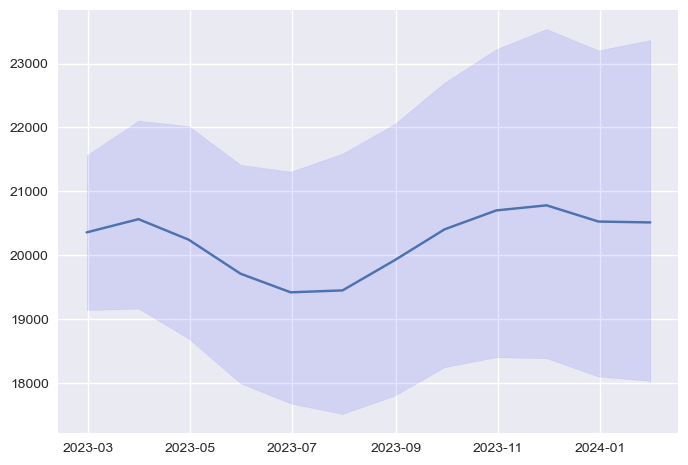

In [207]:
pred_ci = ets_forecast(model_ets, 12)

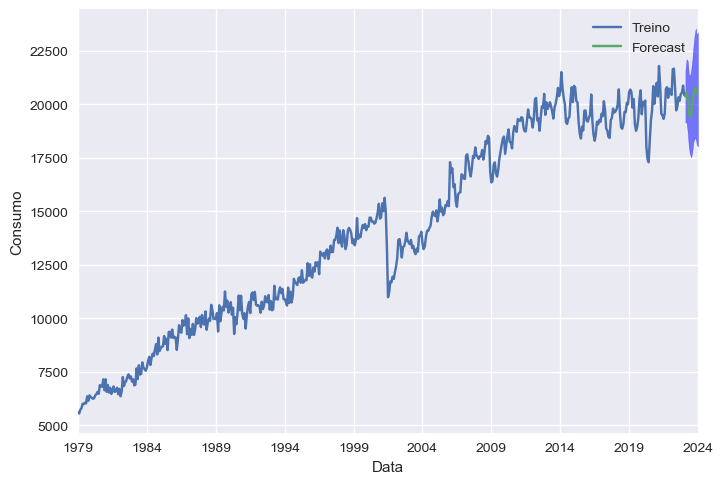

In [208]:
ax = consumo_se.plot(label='Treino')
pred_ets.plot(label= 'Forecast') # previsão do modelo

ax.fill_between(pred_ci.index, # datas
                pred_ci['lower'], # intervalo de confiança inferior
                pred_ci['upper'], # intervalo de confiança superior
                color='blue', alpha=.50)

plt.xlabel('Data')
plt.ylabel('Consumo')
plt.legend()

## Análise dos Resíduos

Os resíduos não devem ser correlacionados, caso sejam correlacionados significa que ficou alguma informação nos resíduos que deveria ser adicionada no modelo.

Sendo assim, deve partir para a análise dos efeitos Arch de heterocedasticidade.

In [209]:
model_ets.resid

1979-01-31   -0.067763
1979-02-28   -0.013622
1979-03-31    0.026152
1979-04-30   -0.008274
1979-05-31    0.044369
                ...   
2022-09-30   -0.035808
2022-10-31   -0.010580
2022-11-30   -0.005251
2022-12-31    0.029822
2023-01-31   -0.013185
Freq: M, Length: 529, dtype: float64

In [210]:
model_ets.fittedvalues

1979-01-31     6031.728385
1979-02-28     5627.660676
1979-03-31     5579.097904
1979-04-30     5845.363725
1979-05-31     5747.013122
                  ...     
2022-09-30    20912.847028
2022-10-31    20707.075666
2022-11-30    20642.383602
2022-12-31    20266.615246
2023-01-31    20695.874261
Freq: M, Length: 529, dtype: float64

In [211]:
consumo_se

1979-01-31     5623.0
1979-02-28     5551.0
1979-03-31     5725.0
1979-04-30     5797.0
1979-05-31     6002.0
               ...   
2022-09-30    20164.0
2022-10-31    20488.0
2022-11-30    20534.0
2022-12-31    20871.0
2023-01-31    20423.0
Freq: M, Length: 529, dtype: float64

In [212]:
residuos = consumo_se - model_ets.fittedvalues

<AxesSubplot:>

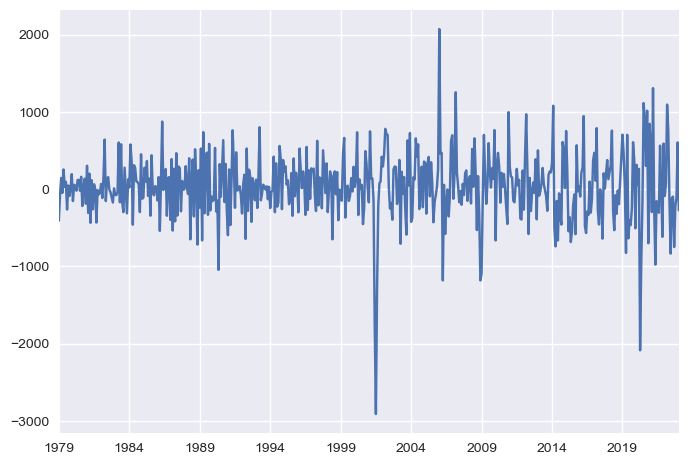

In [213]:
residuos.plot()

<AxesSubplot:>

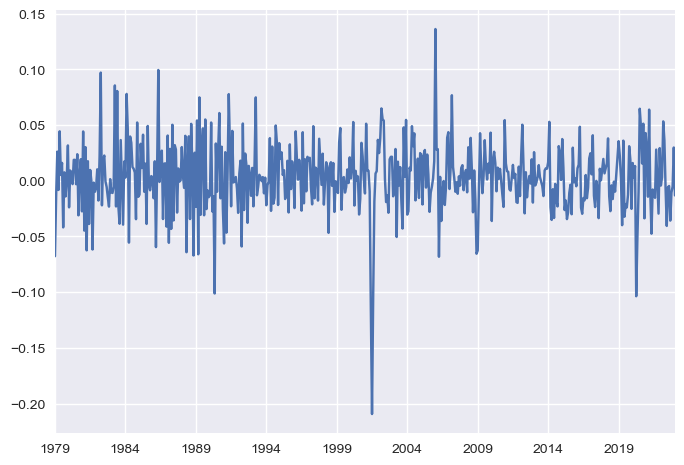

In [214]:
model_ets.resid.plot()

Analisando o ACF temos algumas lags signficativas e várias não significativas. <br>
Necessário fazer o teste de hipótese de Ljung-box

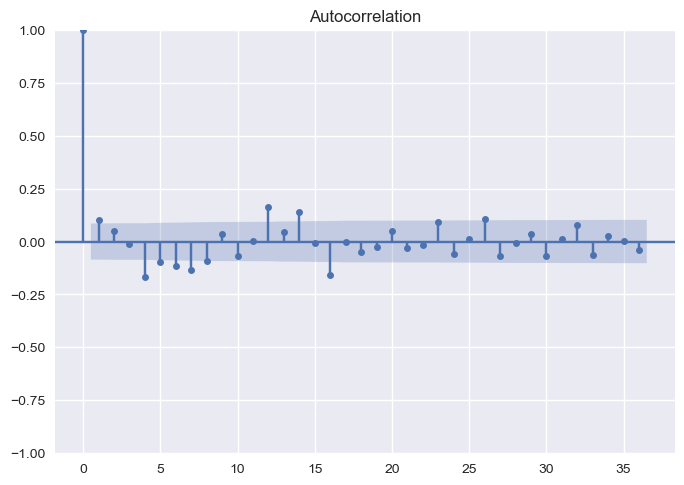

In [215]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Configurações do plot

plot_acf(residuos, lags=36);

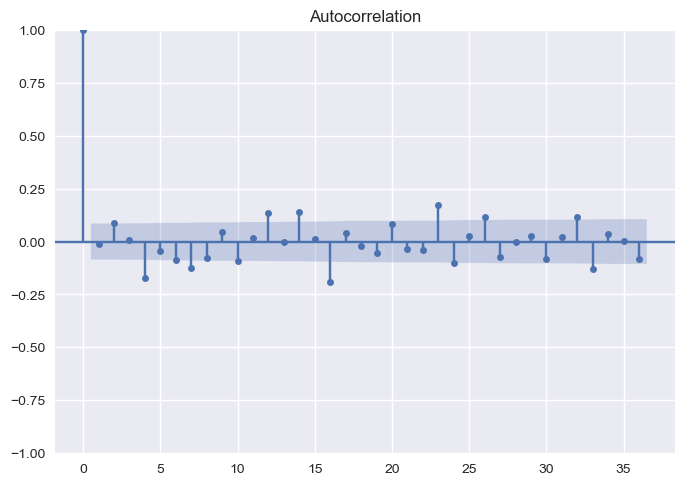

In [216]:
plot_acf(model_ets.resid, lags=36);

### Teste de Ljung-Box

Referência: https://koalatea.io/python-ljung-box-test/ <br>
Documentação: https://www.statsmodels.org/devel/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html

O teste de Ljung-Box é um teste estatístico que pode ser usado para avaliar a presença de autocorrelação nos resíduos de uma série temporal. <br>
Ele é usado para verificar se as autocorrelações nos resíduos são significativamente diferentes de zero para um determinado número de defasagens.


> **H0: Os resíduos são independentes (modelo não exibe falhas de ajustes)<br>**

> H1: Os resíduos não são independentes (modelo exibe falhas de ajustes)

p-valor < 0.05 rejeita H0 

df no modelo é calculado como p+q (1(p) + 2(q) + 1(P))

In [239]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(residuos, 
                                return_df=True, 
                                lags=[12]) # quantidade de lags escolhida pode casar com a quantidade de períodos de sazonalidade
ljung_box_test

lb_stat     lb_pvalue
12  65.275407  2.424594e-09

No R o valor do teste de Ljung-Box foi de 0.12, ou seja, os resíduos não são correlacionados.

### Teste de Heterocedasticidade de Arch

O teste de Lagrange multiplier, também conhecido como teste LM, é um teste estatístico amplamente usado para avaliar a heterocedasticidade em um modelo de regressão. O p-value do teste de Lagrange multiplier indica a probabilidade de obter um valor estatisticamente significativo do teste, considerando que a hipótese nula seja verdadeira.

Na interpretação do p-value do teste LM, podemos seguir a regra geral:

> H0: Existe heterocedasticidade no modelo;

> H1: Não existe heterocedasticidade no modelo;

p_value < 0,05 rejeita H0

Se o p-value for menor que um nível de significância pré-determinado (geralmente 0,05 ou 0,01), podemos rejeitar a hipótese nula. Isso indica que há evidências estatísticas suficientes para concluir que existe heterocedasticidade no modelo.


Se o p-value for maior que o nível de significância, não temos evidências suficientes para rejeitar a hipótese nula. Nesse caso, não podemos afirmar com confiança que há heterocedasticidade no modelo.

In [218]:
# https://www.statsmodels.org/devel/generated/statsmodels.stats.diagnostic.het_arch.html
from statsmodels.stats.diagnostic import het_arch

teste_arch = het_arch(residuos)
print(f'stat: {teste_arch[0]}')
print(f'p_value: {teste_arch[1]}')

stat: 49.49863836710936
p_value: 3.2997563887125015e-07


Os resíduos não são heterocedásticos

# Treino e Teste no Modelo

In [258]:
train_consumo = consumo_se[:'2022-02-01']

teste_consumo = consumo_se['2022-02-01':]

In [259]:
train_consumo

1979-01-31     5623.0
1979-02-28     5551.0
1979-03-31     5725.0
1979-04-30     5797.0
1979-05-31     6002.0
               ...   
2021-09-30    20710.0
2021-10-31    20798.0
2021-11-30    20302.0
2021-12-31    20724.0
2022-01-31    20522.0
Freq: M, Length: 517, dtype: float64

In [261]:
teste_consumo

2022-02-28    20437.0
2022-03-31    21632.0
2022-04-30    21663.0
2022-05-31    20739.0
2022-06-30    19714.0
2022-07-31    19893.0
2022-08-31    20323.0
2022-09-30    20164.0
2022-10-31    20488.0
2022-11-30    20534.0
2022-12-31    20871.0
2023-01-31    20423.0
Freq: M, dtype: float64

In [262]:
model_ets2 = ETSModel(train_consumo, 
                     error='mul', 
                     trend='add', 
                     damped_trend=True, 
                     seasonal='mul',
                     freq='M').fit()

In [267]:
# Previsão
pred_ets2 = model_ets2.forecast(steps=12)

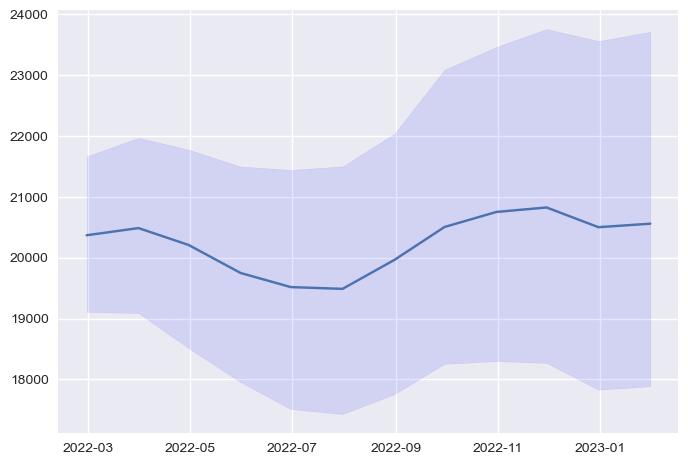

In [268]:
# Intervalo de Confiânça
pred_ci = ets_forecast(model_ets2, 12)

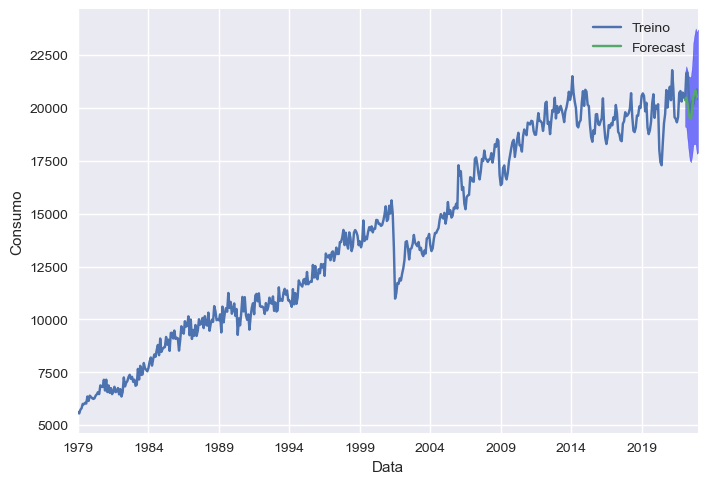

In [269]:
ax = consumo_se.plot(label='Treino')
pred_ets2.plot(label= 'Forecast') # previsão do modelo

ax.fill_between(pred_ci.index, # datas
                pred_ci['lower'], # intervalo de confiança inferior
                pred_ci['upper'], # intervalo de confiança superior
                color='blue', alpha=.50)

plt.xlabel('Data')
plt.ylabel('Consumo')
plt.legend()

# Indicadores de Acurácia

In [270]:
def func_erros(previsao, teste):

    # calcular as estatísticas de erro
    mae = np.mean(np.abs(previsao - teste))
    mse = np.mean((previsao - teste)**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((teste - previsao) / teste)) * 100

    return print('MAE:', mae), print('MSE:', mse), print('RMSE:', rmse), print('MAPE:', mape)

In [271]:
func_erros(pred_ets2, teste_consumo)

MAE: 501.2928286373535
MSE: 430025.3302567459
RMSE: 655.7631662854707
MAPE: 2.39390242621885


(None, None, None, None)

Erro Percentual Médio (MAPE) de apenas 2.39%

# Modelo AUTO-ARIMA

Documentação: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

Dicas: https://alkaline-ml.com/pmdarima/tips_and_tricks.html#period

In [283]:
from pmdarima.arima import auto_arima

arima_se = auto_arima(train_consumo,
                        seasonal=True, m=12, #anual
                        error_action='ignore', suppress_warnings=True, 
                        stepwise=True)

arima_se.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  517
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -3854.685
Date:                                 Wed, 24 May 2023   AIC                           7719.370
Time:                                         21:05:01   BIC                           7740.600
Sample:                                     01-31-1979   HQIC                          7727.689
                                          - 01-31-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2669      0.030     -8.831      0.000      -0.326      -0.208
ar.S.L12       0.9750      0.019     52.021      0.000       0.938       1.012
ma.S.L12      -0.7126      0.046    -15.400      0.000      -0.803      -0.622
ma.S.L24      -0.1422      0.045     -3.144      0.002      -0.231      -0.054
sigma2      1.769e+05   6913.195     25.589      0.000    1.63e+05     1.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               694.31
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [287]:
pred_arima = arima_se.predict(n_periods=12, 
                                   return_conf_int=True, 
                                   alpha = 0.05) #Intervalo de confiança de 5% (1-alpha)

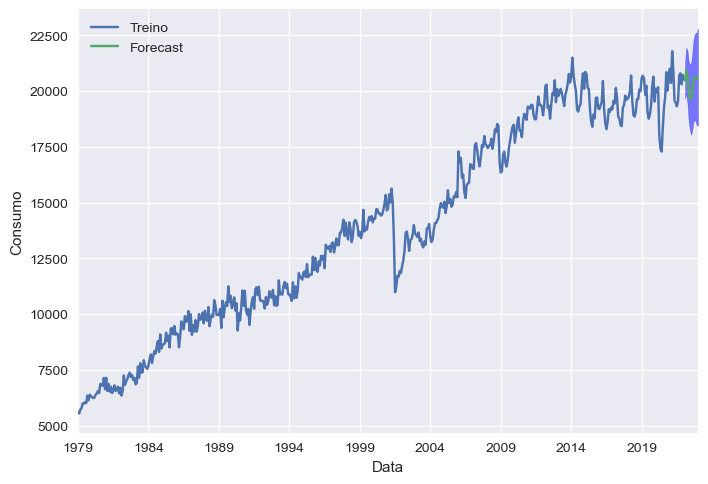

In [288]:
#ax = chpras_fat.chpras_fat_primo.plot(label='observado', figsize=(20,15))

ax = train_consumo.plot(label='Treino')
pred_arima[0].plot(label= 'Forecast') # previsão do modelo

ax.fill_between(pred_arima[0].index, # datas
                pred_arima[1][:,0], # intervalo de confiança inferior
                pred_arima[1][:,1], # intervalo de confiança superior
                color='blue', alpha=.50)

plt.xlabel('Data')
plt.ylabel('Consumo')
plt.legend()

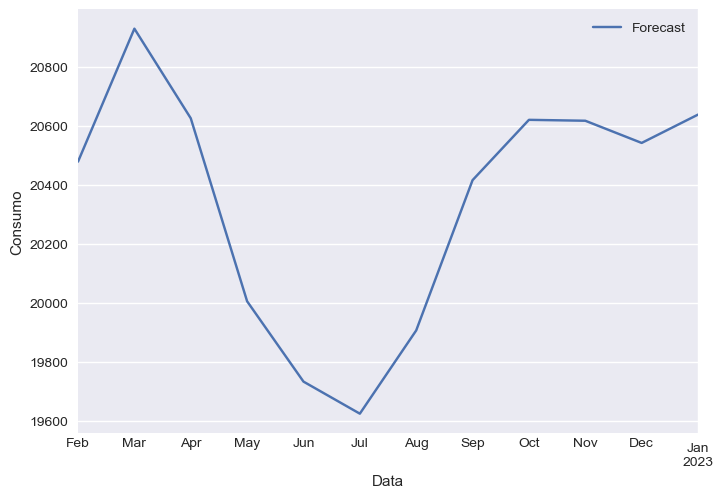

In [289]:
pred_arima[0].plot(label= 'Forecast') # previsão do modelo

ax.fill_between(pred_arima[0].index, # datas
                pred_arima[1][:,0], # intervalo de confiança inferior
                pred_arima[1][:,1], # intervalo de confiança superior
                color='blue', alpha=.50)

plt.xlabel('Data')
plt.ylabel('Consumo')
plt.legend()

In [291]:
func_erros(pred_arima[0], teste_consumo)

MAE: 352.4984023186228
MSE: 216419.26876848354
RMSE: 465.2088442500675
MAPE: 1.6832706861924798


(None, None, None, None)

MODELO AUTO-ARIMA DEU UM MAPE DE 1.68%, MELHOR MODELO